[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/02_numerics/euler_stability.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A script that illustrates the stability of Euler's method
# Cannot use lambda because it is used in Python to declare an anonymous function
lam = -1+5j

# Define time span
t0 = 0
tend = 20

# Set initial condition
y0 = 1

# Define timestep
dt = 0.1
# dt = 1. 
# dt = 0.03

# The number of timesteps (no adaptive timesteps yet)
nt = round((tend-t0)/dt + 1.e-6)

In [3]:
# Initialize solution arrays
t = np.zeros(nt)
y = np.zeros(nt).astype(complex)
y_b_euler = np.zeros(nt).astype(complex)
t[0] = t0 # first time
y[0] = y0 # initialize forward Euler Solution
y_b_euler[0] =y0 # initialize backward Euler Solution

# Euler's method
for i in range(0,nt-1):
    # Increment time
    t[i+1] = t[i] + dt
    # Forward Euler
    y[i+1] = y[i] + dt*lam*y[i]
    # Backward Euler
    y_b_euler[i+1] = y_b_euler[i] / (1-dt*lam)

# Compute exact solution for reference
nt_exact = 10000
t_exact = np.arange(0,nt_exact+1) * (tend-t0) / nt_exact + t0
y_exact = y0*np.exp(lam*t_exact)

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

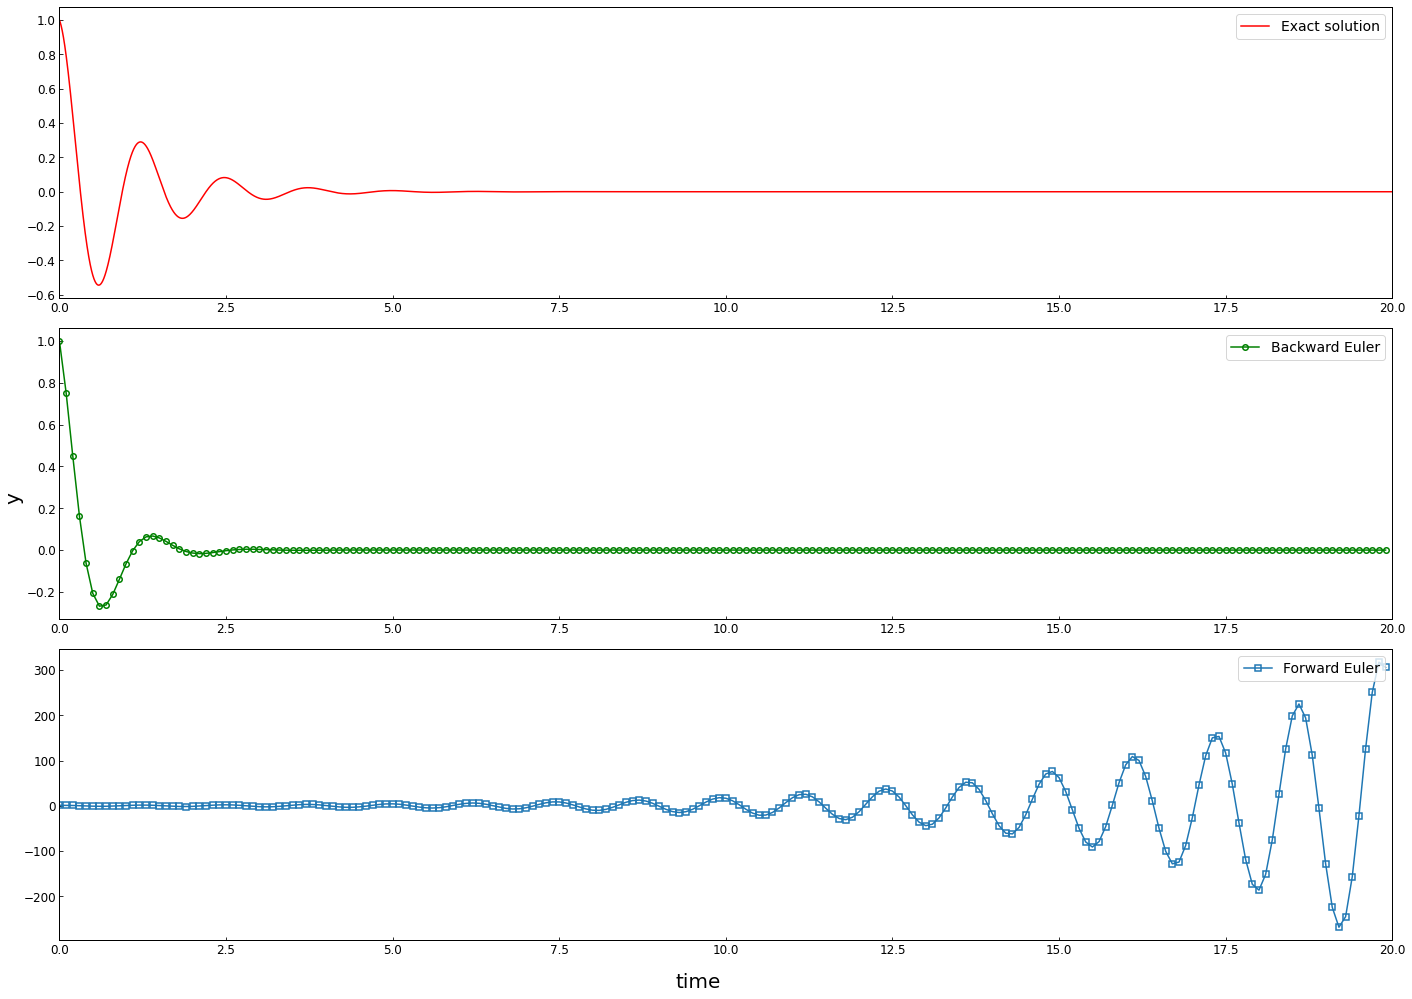

In [5]:
# Plot numerical and analytical solutions
fig, axs = plt.subplots(3,1,figsize=(20,14))

# Exact solution
axs[0].plot(t_exact, np.real(y_exact), linewidth=1.5, color='r', label='Exact solution')
axs[0].set_xlim(0,20)
axs[0].legend(loc='upper right')
# Backward Euler
axs[1].plot(t, np.real(y_b_euler), '-o', linewidth=1.5, color='g', mfc='none', ms=5.5, mew=1.5, label='Backward Euler')
axs[1].set_xlim(0,20)
axs[1].legend(loc='upper right')
# Forward Euler
axs[2].plot(t, np.real(y), '-s', linewidth=1.5, color='tab:blue', mfc='none', ms=5.5, mew=1.5, label='Forward Euler')
axs[2].set_xlim(0,20)
axs[2].legend(loc='upper right')

# Common/shared axes labels
fig.supxlabel('time')
fig.supylabel(r'$y$')

fig.tight_layout()
plt.show()

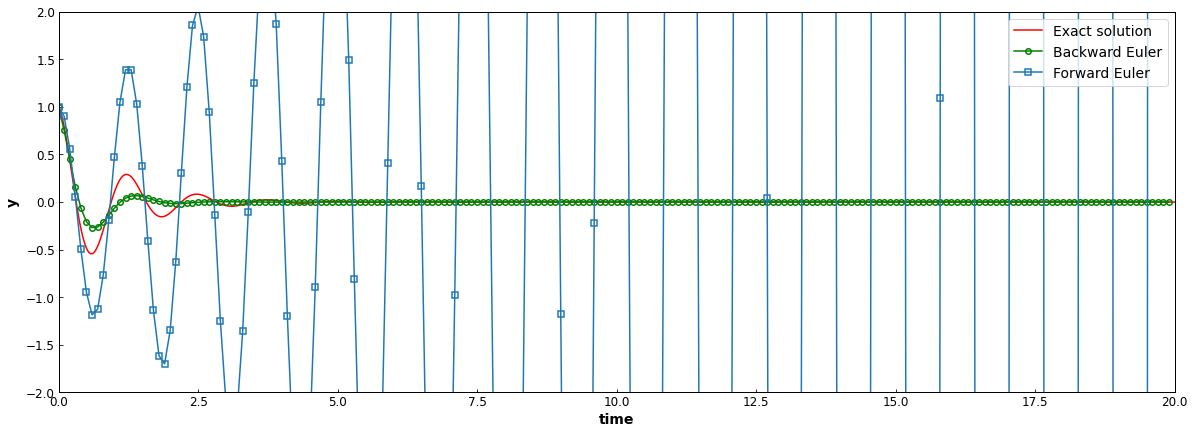

In [6]:
# Combine three plots into one
# Plot numerical and analytical solutions
fig, ax = plt.subplots(1,1,figsize=(20,7))

# Exact solution
ax.plot(t_exact, np.real(y_exact), linewidth=1.5, color='r', label='Exact solution')
# Backward Euler
ax.plot(t, np.real(y_b_euler), '-o', linewidth=1.5, color='g', mfc='none', ms=5.5, mew=1.5, label='Backward Euler')
# Forward Euler
ax.plot(t, np.real(y), '-s', linewidth=1.5, color='tab:blue', mfc='none', ms=5.5, mew=1.5, label='Forward Euler')

# Set axes range
ax.set_xlim(0,20)
ax.set_ylim(-2,2)

# Set axes labels and figure title
ax.set_xlabel('time')
ax.set_ylabel(r'$y$')
ax.legend(loc='upper right')

plt.show()